In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
%matplotlib inline


#### open an interactive session

In [3]:
sess = tf.InteractiveSession()

## Let's check how different arguments in tf.nn.conv2d work

#### First we want to check how the strides parameter works, therefore we create a placeholder and a convolution

In [4]:
x = tf.placeholder(tf.float32, shape=(5,5))

#### For the sake of simplicity we just use ones for our convolutional layer. W_conv has the following form: first two refer to the patch size, the third is the input channel, the last is the number of output channels.

In [5]:
W_conv = tf.Variable(tf.ones([1,1,1,1]))

In [6]:
x_ = tf.reshape(x, [-1,5,5,1])

In [7]:
conv_x = tf.nn.conv2d(x_, W_conv, strides=[1,1,1,1], padding='SAME')

In [8]:
M= np.reshape(np.linspace(1,25,25), (5,5))

In [9]:
M

array([[  1.,   2.,   3.,   4.,   5.],
       [  6.,   7.,   8.,   9.,  10.],
       [ 11.,  12.,  13.,  14.,  15.],
       [ 16.,  17.,  18.,  19.,  20.],
       [ 21.,  22.,  23.,  24.,  25.]])

In [10]:
sess.run(tf.global_variables_initializer())

In [11]:
print(sess.run(conv_x, feed_dict={x: M}))

[[[[  1.]
   [  2.]
   [  3.]
   [  4.]
   [  5.]]

  [[  6.]
   [  7.]
   [  8.]
   [  9.]
   [ 10.]]

  [[ 11.]
   [ 12.]
   [ 13.]
   [ 14.]
   [ 15.]]

  [[ 16.]
   [ 17.]
   [ 18.]
   [ 19.]
   [ 20.]]

  [[ 21.]
   [ 22.]
   [ 23.]
   [ 24.]
   [ 25.]]]]


In [12]:
conv_x2 = tf.nn.conv2d(x_, W_conv, strides=[1,2,1,1], padding='SAME')

In [13]:
print(sess.run(conv_x2, feed_dict={x: M}))

[[[[  1.]
   [  2.]
   [  3.]
   [  4.]
   [  5.]]

  [[ 11.]
   [ 12.]
   [ 13.]
   [ 14.]
   [ 15.]]

  [[ 21.]
   [ 22.]
   [ 23.]
   [ 24.]
   [ 25.]]]]


In [14]:
M

array([[  1.,   2.,   3.,   4.,   5.],
       [  6.,   7.,   8.,   9.,  10.],
       [ 11.,  12.,  13.,  14.,  15.],
       [ 16.,  17.,  18.,  19.,  20.],
       [ 21.,  22.,  23.,  24.,  25.]])

In [15]:
test = sess.run(conv_x2, feed_dict={x: M})

In [16]:
test = test[0,:,:,0]

In [17]:
test

array([[  1.,   2.,   3.,   4.,   5.],
       [ 11.,  12.,  13.,  14.,  15.],
       [ 21.,  22.,  23.,  24.,  25.]], dtype=float32)

In [18]:
h_pool2 = tf.nn.max_pool(conv_x2, ksize=[1, 1, 2, 1],
                        strides=[1, 1, 1, 1], padding='SAME')

In [19]:
print(sess.run(h_pool2, feed_dict={x: M}))

[[[[  2.]
   [  3.]
   [  4.]
   [  5.]
   [  5.]]

  [[ 12.]
   [ 13.]
   [ 14.]
   [ 15.]
   [ 15.]]

  [[ 22.]
   [ 23.]
   [ 24.]
   [ 25.]
   [ 25.]]]]


#### So we see the effect of changing strides (and ksize): the strides changes the step-size of the elements we choose. In this example we set the step-size for rows to 2, meaning that only every second row is taken into account

#### Now let's put everything together in a function so that we can vary the parameters easily

In [20]:
def convolution_test(W_shape, strides):
    x = tf.placeholder(tf.float32, shape=(5,5))
    W_conv = tf.Variable(tf.ones(W_shape))
    x_ = tf.reshape(x, [-1,5,5,1])
    conv_x = tf.nn.conv2d(x_, W_conv, strides=strides, padding='SAME')
    sess.run(tf.global_variables_initializer())
    print(sess.run(conv_x, feed_dict={x: M}))

#### Let's test this function

In [21]:
convolution_test([1,1,1,1], [1,1,1,1])

[[[[  1.]
   [  2.]
   [  3.]
   [  4.]
   [  5.]]

  [[  6.]
   [  7.]
   [  8.]
   [  9.]
   [ 10.]]

  [[ 11.]
   [ 12.]
   [ 13.]
   [ 14.]
   [ 15.]]

  [[ 16.]
   [ 17.]
   [ 18.]
   [ 19.]
   [ 20.]]

  [[ 21.]
   [ 22.]
   [ 23.]
   [ 24.]
   [ 25.]]]]


#### This is what we already know, now let's see what happens if we have more output channels

In [22]:
convolution_test([1,1,1,2], [1,1,1,1])

[[[[  1.   1.]
   [  2.   2.]
   [  3.   3.]
   [  4.   4.]
   [  5.   5.]]

  [[  6.   6.]
   [  7.   7.]
   [  8.   8.]
   [  9.   9.]
   [ 10.  10.]]

  [[ 11.  11.]
   [ 12.  12.]
   [ 13.  13.]
   [ 14.  14.]
   [ 15.  15.]]

  [[ 16.  16.]
   [ 17.  17.]
   [ 18.  18.]
   [ 19.  19.]
   [ 20.  20.]]

  [[ 21.  21.]
   [ 22.  22.]
   [ 23.  23.]
   [ 24.  24.]
   [ 25.  25.]]]]


#### This does not really make sense yet, we'll check the use of multiple output channels later

#### Ok, let's continue with changing the size of W. 

In [23]:
convolution_test(W_shape=[2,2,1,1], strides=[1,2,2,1])

[[[[ 16.]
   [ 24.]
   [ 15.]]

  [[ 56.]
   [ 64.]
   [ 35.]]

  [[ 43.]
   [ 47.]
   [ 25.]]]]


We don't just select the elements in dummy_x any more, but combine them together. Because W is chosen to contain only ones, we perfor a simple summation of the elements in dummy_x. For illustration we show how to calculate the first elements: summing up all red elements is 16. Doing the same for blue and green is 24, 15 respectively.
Continuing this pattern leads to all the other numbers displayed one cell above.

$
\newcommand{\cr}{\color{red}}
\newcommand{\cb}{\color{blue}}
\newcommand{\cg}{\color{green}}
M=
  \begin{bmatrix}
    \cr1 & \cr2 & \cb3 & \cb4 & \cg5 \\
    \cr6 & \cr7 & \cb8 & \cb9 & \cg{10} \\
    11 & 12 & 13 & 14 & 15 \\
    16 & 17 & 18 & 19 & 20 \\
    21 & 22 & 23 & 24 & 25
  \end{bmatrix}
$

## Now let's apply an convolutional layer to an image 

#### skimage (a.k.a. sci-kit image) offers the images we will be using in this tutorial (and actually many other interesting tools, so check that out if you're interested)

In [24]:
from skimage import data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
im = data.astronaut()

<class 'numpy.ndarray'> uint8 (512, 512, 3)


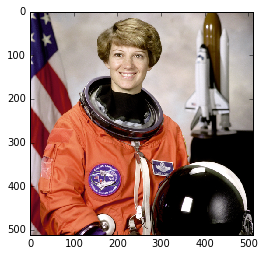

In [25]:
print(type(im), im.dtype, im.shape)
plt.imshow(im, cmap='gray', interpolation='nearest');

#### Unfortunately skimage gives us the images in an RGB format, therefore we have a 3-dim tensor to treat. We actually convert this to 2d to stick with the things we used beforehand

In [26]:
im.shape

(512, 512, 3)

In [27]:
def rgb2gray(rgb):
    #see https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [28]:
im_grey = rgb2gray(im)

In [29]:
im_grey.shape

(512, 512)

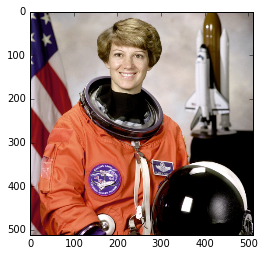

In [30]:
plt.imshow(im)

#### Perfect let's do some convolution stuff on this picture

We use W as a placeholder here because we don't want to change its value

In [31]:
W_ = tf.placeholder(tf.float32, shape=[3,3])

In [32]:
W = tf.reshape(W_, [3,3,1,-1])

Placeholder for the image

In [33]:
x_ = tf.placeholder(tf.float32, shape=[512,512])

In [34]:
x = tf.reshape(x_, [-1,512,512,1])

The actual filter we are using to process the image

In [35]:
A = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

In [36]:
A

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [37]:
conv_x = tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

In [38]:
to_plot = sess.run(conv_x, feed_dict={W_:A, x_:im_grey})

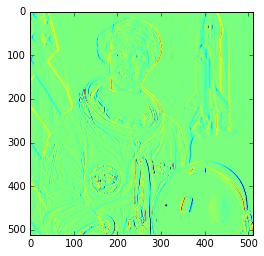

In [39]:
plt.imshow(to_plot[0,:,:,0])

#### Now let's put this in a function and play around

In [40]:
def conv_test2(A):
    W_ = tf.placeholder(tf.float32, shape=A.shape)
    W = tf.reshape(W_, [A.shape[0],A.shape[1],1,-1])
    x_ = tf.placeholder(tf.float32, shape=[512,512])
    x = tf.reshape(x_, [-1,512,512,1])
    conv_x = tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')
    to_plot = sess.run(conv_x, feed_dict={W_:A, x_:im_grey})
    plt.imshow(to_plot[0,:,:,0])

In [41]:
A = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

In [42]:
A.shape

(3, 3)

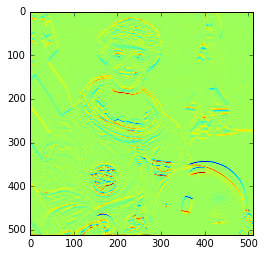

In [43]:
conv_test2(A)

Previously we were highlighting vertical edges, the current filter highlights horizontal edges. Now let's have a look at undirected edges

In [44]:
A_un = np.array([[1,1,1],[1,-8,1],[1,1,1]])

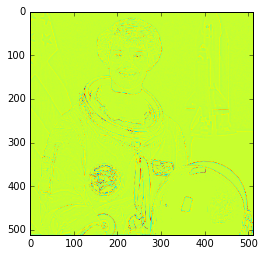

In [45]:
conv_test2(A_un)

In [70]:
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 15, 15, 1],
                        strides=[1, 5, 5, 1], padding='SAME')


### Now we use pooling layers

In [71]:
W_ = tf.placeholder(tf.float32, shape=[3,3])
W = tf.reshape(W_, [3,3,1,-1])
x_ = tf.placeholder(tf.float32, shape=[512,512])
x = tf.reshape(x_, [-1,512,512,1])
conv_x = tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')
h_pool = max_pool_2x2(conv_x)

In [72]:
image = sess.run(h_pool, feed_dict={W_:A, x_:im_grey})

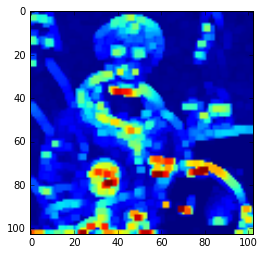

In [73]:
plt.imshow(image[0,:,:,0])

#### Now we just need to combine everything we know and can construct complex models